In [3]:
%load_ext autoreload
%autoreload 2

from cnn import CNN
from experiment import Experiment
from util import Util
from patch import Patch
from fixer import Fixer
from uglify import Uglify

from PIL import Image
import mahotas as mh
import numpy as np
import os
import cPickle as pickle
from string import Template
import shutil

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")
tifffile.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
tifffile.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
tifffile.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


In [4]:
input_vi = [
0.4564952265,
0.4293922557,
0.4181262577,
0.4176715561,
0.4907196995,
0.4620027692,
0.5851840841,
0.6340148263,
0.655254341,
0.5968352055
]

automatic = [
0.4184509334,
0.3921248742,
0.4247579858,
0.421609118,
0.4202030953,
0.4227406441,
0.5567583337,
0.6766219832,
0.6145879465,
0.6214100099,

]

automatic_splits_only = [
0.4449616905,
0.3949095913,
0.4247579858,
0.421609118,
0.4389316885,
0.4227406441,
0.5567583337,
0.6766219832,
0.6499956639,
0.6224132199

]

user_guided = [
0.3901616312,
0.3786552139,
0.3649150587,
0.3438450134,
0.3887227169,
0.3703256924,
0.4262203883,
0.4595732983,
0.4302968615,
0.390326227

]

dojo_best_user = [
0.3764043166,
0.3516472472,
0.4079547444,
0.4530306854,
0.489459557,
0.4783714198,
0.4691797846,
0.4852945057,
0.4989719721,
0.4631116968

]

dojo_avg_user = [
0.4731860794,
0.4412143846,
0.4645102603,
0.4790327986,
0.5483534853,
0.5209529753,
0.5614397773,
0.5669964498,
0.6037881064,
0.5986637472

]
### OLD

In [5]:
user_guided = [0.3637213275138995,
 0.37865521385721834,
 0.3708380370394124,
 0.34384501342222507,
 0.3887227169421976,
 0.374599880105297,
 0.4262203882999849,
 0.45957329825904836,
 0.43496686522858763,
 0.390326227022304]

automatic_splits_only = [0.4050252609261351,
 0.4121594568115894,
 0.4174358331250909,
 0.4085899806629625,
 0.4450977317739859,
 0.6821418080964907,
 0.6761792610958874,
 0.6780144964186565,
 0.7244383123213112,
 0.6009401712609836]

automatic = [0.3783149884453847,
 0.4094563733013521,
 0.4494351765024307,
 0.4085899806629625,
 0.4485694416162014,
 0.6821418080964907,
 0.6761792610958874,
 0.6780144964186565,
 0.6899289717002173,
 0.6136686637069246]


In [6]:
automatic_splits_only = [0.42796251983337186,
 0.4217174392978089,
 0.4174358331250909,
 0.4082669364230478,
 0.48121201135467473,
 0.47232855073229363,
 0.6060713480109081,
 0.64878844095671,
 0.6834066933519818,
 0.6713322951756702]

In [7]:
# single grab
user_guided = [0.3901616311678895,
 0.37865521385721834,
 0.3635887393126289,
 0.34384501342222507,
 0.3887227169421976,
 0.3703256924298932,
 0.4262203882999849,
 0.45957329825904836,
 0.43536902912260356,
 0.390326227022304]

In [71]:
np.mean(automatic_splits_only)

0.52385220682615574

In [82]:
np.median(user_guided)

0.38944217405504356

In [9]:

first120global_random_splits = [0.4514940333198574, 0.42835110854117, 0.41076205852335335, 0.41718561754641925, 0.4892850138173239, 0.46168070138874384, 0.58475940197643, 0.6158294254617935, 0.6543716930561674, 0.5868221046635824]

In [8]:
first120global_splits = [0.4050252609261369, 0.4121594568115894, 0.3918172770092099, 0.4053514521002537, 0.4337343707604937, 0.41851464530707894, 0.5240820744039167, 0.5830389613197333, 0.6172253790488904, 0.4922499542447536]



#[0.4050252609261369, 0.4121594568115894, 0.3918172770092099, 0.4053514521002537, 0.4337343707604937, 0.41851464530707894, 0.5240820744039167, 0.5830389613197333, 0.6172253790488904, 0.4922499542447536]

In [107]:
first120global_merges = [0.4300420889106302,
  0.4267707250221644,
  0.41812625771753,
  0.4176715560855522,
  0.49071969954324857,
  0.46200276923857864,
  0.5851840840738847,
  0.6199472751100883,
  0.6393593701593003,
  0.5968352054773662]

In [121]:
first120global_random_merges = [0.4564952264711417,
  0.4267707250221644,
  0.41812625771753,
  0.4176715560855522,
  0.49071969954324857,
  0.46200276923857864,
  0.5851840840738847,
  0.6340148263120815,
  0.6393593701593003,
  0.5968352054773662]

In [122]:
data = [ automatic, automatic_splits_only, user_guided, dojo_best_user, dojo_avg_user, user_guided_limit, input_vi, first120global_splits, first120global_random_splits,
        first120global_merges_new]

In [10]:
data = [input_vi, dojo_avg_user ,  dojo_best_user, 
        
        first120global_splits,        
        first120global_random_splits,        
        automatic ,]

In [11]:
for d in data:
    print np.median(d)

0.47636123435
0.5346532303
0.4661457407
0.426124508034
0.475482857603
0.531551920105


In [125]:
user_guided_limit

[0.40076329105517683,
 0.3796133639632817,
 0.3661324596544393,
 0.39954443665185035,
 0.3989458726301276,
 0.44621284364966485,
 0.5533729484432053,
 0.5830389613197342,
 0.6172253790488922,
 0.5607300536090216]

In [128]:
first120global_merges_new = [0.4300420889106302,
  0.4267707250221644,
  0.41812625771753,
  0.41637326173158584,
  0.49071969954324857,
  0.46200276923857864,
  0.5851840840738847,
  0.6340148263120815,
  0.6395141878380075,
  0.5968352054773662]

In [131]:
first120global_random_merges_new = [0.4300420889106302,
  0.4267707250221644,
  0.41812625771753,
  0.41637326173158584,
  0.49071969954324857,
  0.46200276923857864,
  0.5851840840738847,
  0.6340148263120815,
  0.6552543410401137,
  0.5968352054773662]

In [171]:
dojo_avg_user_mean = np.median(dojo_avg_user)

In [173]:
dojo_best_user_mean = np.median(dojo_best_user)

In [172]:
print dojo_avg_user_mean

0.5346532303


In [86]:
dojo_best_user_mean = np.mean(dojo_best_user)

In [87]:
print dojo_best_user_mean

0.44734259296


In [158]:
avg_input_vi = np.median(input_vi)

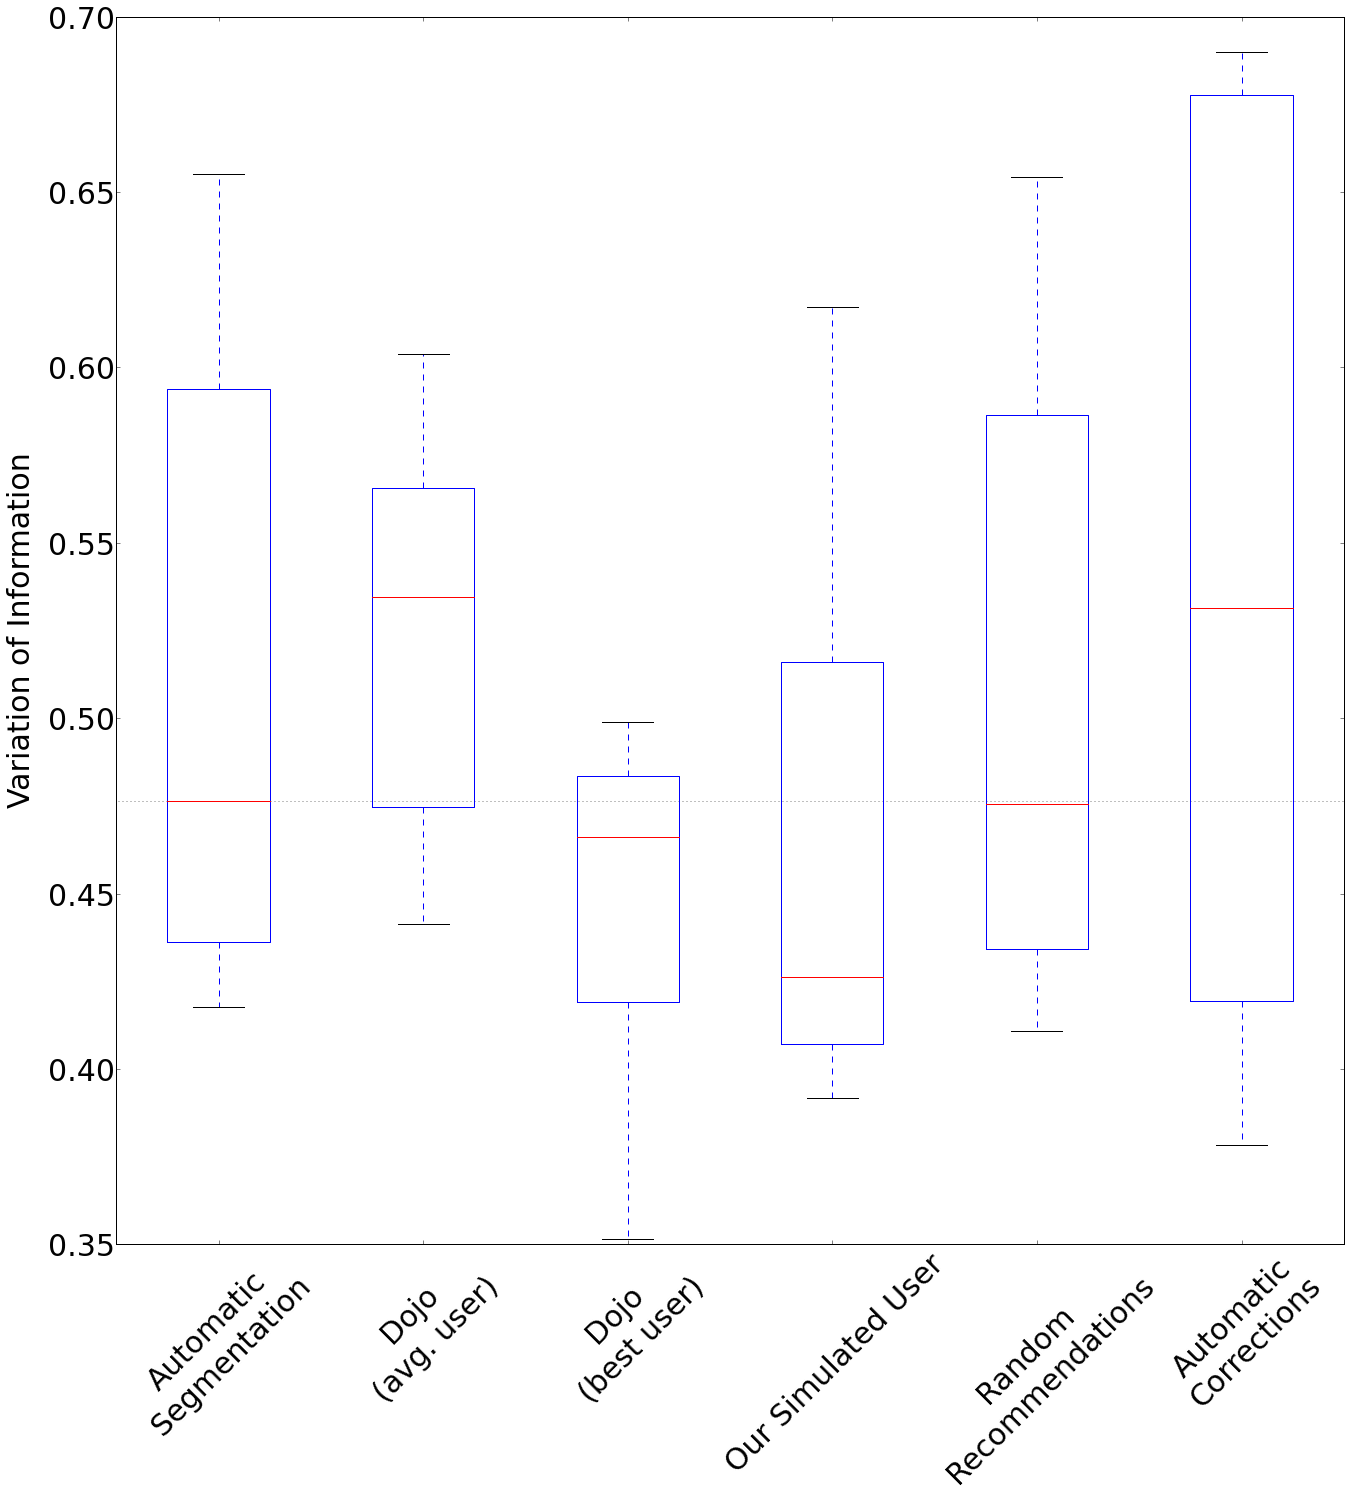

In [160]:

# fake up some data
# spread = np.random.rand(50) * 100
# center = np.ones(25) * 50
# flier_high = np.random.rand(10) * 100 + 100
# flier_low = np.random.rand(10) * -100
# data = np.concatenate((spread, center, flier_high, flier_low), 0)

# don't show outlier points
# plt.figure()
# plt.boxplot(data, 0, '')
fig, ax = plt.subplots(figsize=(22,22))
ax.plot(range(10), [avg_input_vi]*10, 'k:' , color='gray', label='Avg. input VI')
# fake up some more data
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
objects = [ 'Automatic\nSegmentation','Dojo\n(avg. user)', 'Dojo\n(best user)','Our Simulated User',
           'Random\nRecommendations', 'Automatic\nCorrections' ]
y_pos = range(len(objects))
plt.xticks(y_pos, objects)
# legend = ax.legend(loc='upper right', shadow=True)
plt.ylabel('Variation of Information', labelpad=20)
# # The frame is matplotlib.patches.Rectangle instance surrounding the legend.
# frame = legend.get_frame()
# frame.set_facecolor('0.90')
# plt.ylabel('Variation of Information', labelpad=20)
# # Set the fontsize
# for label in legend.get_texts():
#     label.set_fontsize('large')

# for label in legend.get_lines():
#     label.set_linewidth(1.5)  # the legend line width
plt.setp(plt.xticks()[1], rotation=45)
# d2 = np.concatenate((spread, center, flier_high, flier_low), 0)
# data.shape = (-1, 1)
# d2.shape = (-1, 1)
# data = concatenate( (data, d2), 1 )
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
# data = [data, d2, d2[::2, 0]]
# multiple box plots on one figure
# plt.figure()
font = {'family' : 'normal',
#         'weight' : 'bold',
        'size'   : 30}

plt.rc('font', **font)
plt.boxplot(data, 0, 'gD')

plt.savefig('/tmp/out_limit.pdf')

# plt.show()

In [79]:
error_rate_results = [0.39417157822328769,
 0.44262754641950181,
 0.43724463773450906,
 0.48556718867826865,
 0.50630356217978378,
 0.55273909257832943,
 0.63664689837735555,
 0.67180684794910195,
 0.69650814514403092,
 0.94271129915217666]

In [88]:
user_guided_limit = [0.40076329105517683,
 0.3796133639632817,
 0.3661324596544393,
 0.39954443665185035,
 0.3989458726301276,
 0.44621284364966485,
 0.5533729484432053,
 0.5830389613197342,
 0.6172253790488922,
 0.5607300536090216]

In [167]:
error_rate_results = [0.46831988319320567,
 0.47568821586553656,
 0.47480018245646222,
 0.47514757971068072,
 0.4723591055218509,
 0.48913374148222016,
 0.49529540585568893,
 0.49193532618234415,
 0.5066160832826071,
 0.49621513360118585]

In [175]:
error_rate_results = [0.42612450803378632,
 0.46296617139544072,
 0.44995441243875023,
 0.45502578739372401,
 0.43752289166950975,
 0.45261827858947168,
 0.46369569416586565,
 0.45728723762254075,
 0.47940199025731012,
 0.48589741139750675]

In [164]:
error_rate_results =[0.46831988319320567,
 0.49412464595432271,
 0.47950088450191053,
 0.5665148338944761,
 0.54793601660018354]

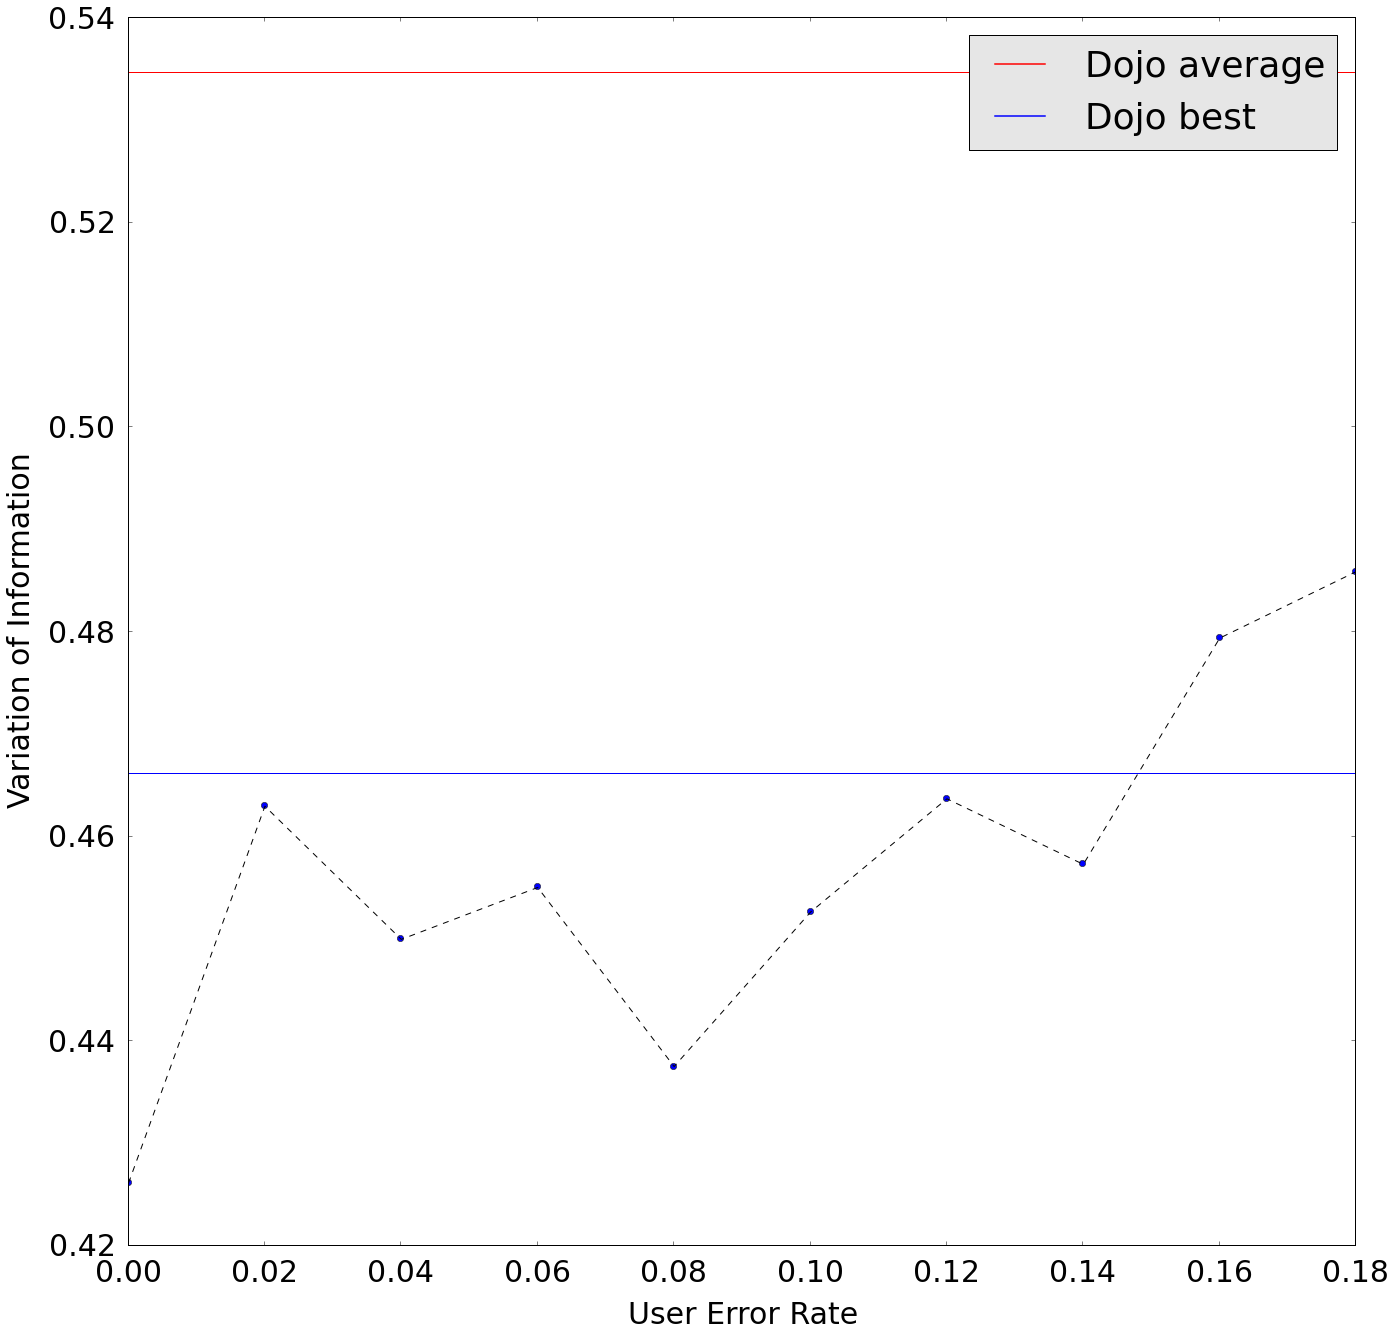

In [179]:
x_labels = range(10)
x_labels = [2*l/100. for l in x_labels]# for l in x_labels:
    
fig, ax = plt.subplots(figsize=(22,22))
ax.plot(x_labels, error_rate_results, 'o')

ax.plot(x_labels, error_rate_results, 'k--')
# ax.plot(epochs, validation_loss, 'k:', label='Validation Loss')
# ax.plot(epochs, validation_acc, 'k', label='Validation Accuracy')
# ax.set_yscale('log')
# ax.plot(range(10), error_rate_results, 'o', label='Training Loss')
# plt.boxplot(error_rate_results)
# Now add the legend with some customizations.
ax.plot(x_labels, [dojo_avg_user_mean]*10, 'k', label='Dojo average', color='red')
ax.plot(x_labels, [dojo_best_user_mean]*10, 'k', label='Dojo best', color='blue')
legend = ax.legend(loc='upper right', shadow=False)
ax.tick_params(axis='both', which='major', pad=15)
plt.ylabel('Variation of Information', labelpad=20)
plt.xlabel('User Error Rate', labelpad=20)
# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.90')
font = {'family' : 'normal',
#         'weight' : 'bold',
        'size'   : 60}

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width

# plt.savefig(OUTPUT_PATH+os.sep+'graph_'+str(epoch)+'.png')
plt.savefig('/tmp/out_er.pdf')

In [30]:
x_labels

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [96]:
import random


In [98]:
np.random.choice(10)

3